In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.feature_selection import f_regression
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
def transform_date(my_date):
    btc_counts = my_date.split("\n")

    my_arr = np.asarray(btc_counts)

    new_btc = []
    for i in my_arr:
        i = i[1:-1]
        new_btc.append(i)
        
    for i in range(len(new_btc)):
        new_btc[i] = new_btc[i].split(',')
    
    for i in range(len(new_btc)):
        for j in range(len(new_btc[i])):
            new_btc[i][j] = new_btc[i][j].split(":")
        
    columns = []
    for i in range(len(new_btc[0])):
        columns.append(new_btc[0][i][0][1:-1])
    
    for i in range(len(new_btc)):
        for j in range(len(new_btc[i])):
            new_btc[i][j].pop(0)
        
    for i in range(len(new_btc)-1):
        new_btc[i][0] = ''.join(new_btc[i][0])
    
        new_btc[i][1] = ''.join(new_btc[i][1])
        new_btc[i][1] = int(new_btc[i][1])
    
        new_btc[i][2] = ''.join(new_btc[i][2])
    
        new_btc[i][3] = ''.join(new_btc[i][3])
        new_btc[i][3] = int(new_btc[i][3])
    
        new_btc[i][4] = ''.join(new_btc[i][4])
        new_btc[i][4] = float(new_btc[i][4][1:-1])
    
        new_btc[i][5] = ''.join(new_btc[i][5])
        new_btc[i][5] = float(new_btc[i][5][1:-1])
    
        new_btc[i][6] = ''.join(new_btc[i][6])
        new_btc[i][6] = int(new_btc[i][6])
    
        new_btc[i][7] = ''.join(new_btc[i][7])
        new_btc[i][7] = int(new_btc[i][7])
    
        new_btc[i][8] = ''.join(new_btc[i][8])
        new_btc[i][8] = int(new_btc[i][8])
    
        new_btc[i][9] = ''.join(new_btc[i][9])
    
        new_btc[i][10] = ''.join(new_btc[i][10])
    
    my_pd = pd.DataFrame(new_btc, columns = columns)
    return my_pd.dropna()

In [3]:
def graphics_dynamic(dataframe):
    fig, (ax1) = plt.subplots(figsize = (20,10), nrows=1, ncols=1)
    ax1.plot(dataframe.E, dataframe.p)
    ax1.set_title('Dynamic')
    ax1.set_ylim(ymin=min(dataframe.p), ymax=max(dataframe.p))
    ax1.set_xlim(xmin=min(dataframe.E), xmax=max(dataframe.E))

    fig.tight_layout()

In [4]:
def graphics_quant(dataframe):
    fig, (ax3) = plt.subplots(figsize = (20,10), nrows=1, ncols=1)
    ax3.plot(dataframe.E, dataframe.q)
    ax3.set_title('Quantity')
    ax3.set_ylim(ymin=min(dataframe.q), ymax=1)
    ax3.set_xlim(xmin=min(dataframe.E), xmax=max(dataframe.E))

In [5]:
def transform_tomM(dataframe1):
    dig = 100
    dataframe = pd.DataFrame({'time':[i for i in range(dataframe1.shape[0]//dig)], 'max':0, 'min':0, 'close':0})
    for i in range(0, example1.shape[0], dig):
        print(f"Процесс преобразования: {int(i/example1.shape[0]*100)}%")
        dataframe['max'][i/dig] = dataframe1.loc[i:i+dig, 'p'].max()
        dataframe['min'][i/dig] = dataframe1.loc[i:i+dig, 'p'].min()
        try:
            dataframe['close'][i/dig] = dataframe1.loc[i+dig, 'p']
        except:
            dataframe['close'][i/dig] = dataframe1.loc[i:i+dig-(i+dig-dataframe1.shape[0])]
    print(f"Процесс преобразования: 100%")
    return dataframe

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Набор данных

In [7]:
with open("C:/Users/rsoko/Desktop/Edu/PyProjetcs/venv/opachki.txt", "r") as f:
    text1 = f.read()

In [8]:
example1 = transform_date(text1)
example1

,e,E,s,t,p,q,b,a,T,m,M
0,"""trade""",1.647782e+12,"""BTCUSDT""",1.298707e+09,41589.98,0.00691,9.899473e+09,9.899482e+09,1.647782e+12,true,true
1,"""trade""",1.647782e+12,"""BTCUSDT""",1.298707e+09,41589.98,0.02975,9.899473e+09,9.899482e+09,1.647782e+12,true,true
2,"""trade""",1.647782e+12,"""BTCUSDT""",1.298707e+09,41589.98,0.00159,9.899473e+09,9.899482e+09,1.647782e+12,true,true
3,"""trade""",1.647782e+12,"""BTCUSDT""",1.298707e+09,41589.98,0.00108,9.899473e+09,9.899482e+09,1.647782e+12,true,true
4,"""trade""",1.647782e+12,"""BTCUSDT""",1.298707e+09,41589.98,0.00064,9.899473e+09,9.899482e+09,1.647782e+12,true,true
...,...,...,...,...,...,...,...,...,...,...,...
122199,"""trade""",1.647793e+12,"""BTCUSDT""",1.298829e+09,41375.95,0.00026,9.901106e+09,9.901106e+09,1.647793e+12,false,true
122200,"""trade""",1.647793e+12,"""BTCUSDT""",1.298829e+09,41375.94,0.00135,9.901106e+09,9.901106e+09,1.647793e+12,true,true
122201,"""trade""",1.647793e+12,"""BTCUSDT""",1.298829e+09,41375.95,0.00971,9.901106e+09,9.901106e+09,1.647793e+12,false,true
122202,"""trade""",1.647793e+12,"""BTCUSDT""",1.298829e+09,41375.95,0.00165,9.901106e+09,9.901106e+09,1.647793e+12,false,true


In [9]:
example1_ = transform_tomM(example1)

Процесс преобразования: 0%


C:\Users\rsoko\AppData\Local\Temp\ipykernel_1912\3439839602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['min'][i/dig] = dataframe1.loc[i:i+dig, 'p'].min()
C:\Users\rsoko\AppData\Local\Temp\ipykernel_1912\3439839602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['close'][i/dig] = dataframe1.loc[i+dig, 'p']


Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 0%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 1%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 2%
Процесс преобразования: 3%
П

Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 28%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 29%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 30%
Процесс преобразования: 31%
Процесс преобразования: 31%
Процесс преобразования: 31%
Процесс преобразован

Процесс преобразования: 68%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 69%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 70%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразования: 71%
Процесс преобразован

In [10]:
example1_

,time,max,min,close
0,0,41589.99,41589.89,41589.89
1,1,41589.89,41587.31,41587.32
2,2,41591.00,41587.31,41590.99
3,3,41599.24,41587.32,41599.24
4,4,41617.77,41595.93,41616.23
...,...,...,...,...
1217,1217,41385.60,41375.98,41382.68
1218,1218,41382.68,41375.00,41375.00
1219,1219,41375.00,41350.00,41350.01
1220,1220,41371.24,41350.00,41371.24


<function matplotlib.pyplot.show(close=None, block=None)>

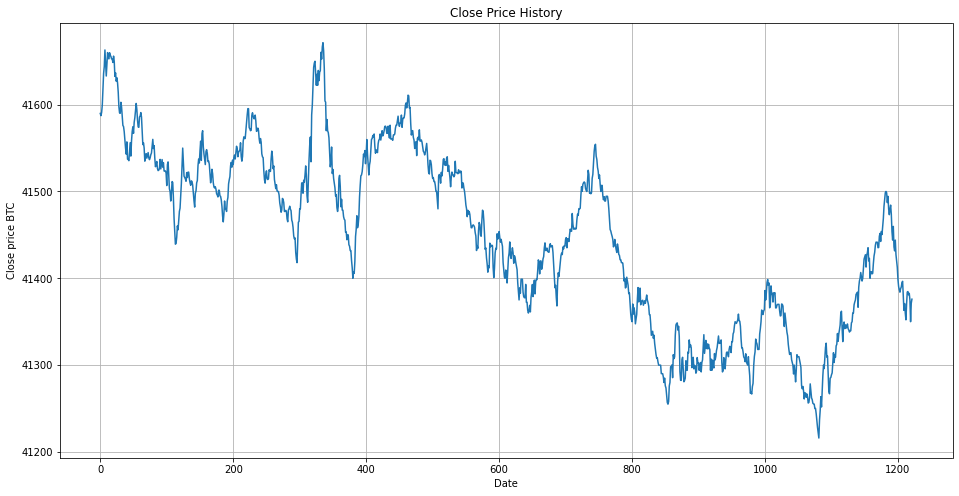

In [11]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(example1_['close'])
plt.xlabel('Date')
plt.ylabel('Close price BTC')
plt.grid()
plt.show

# Подготовка данных

In [115]:
x_dataset = scaler.fit_transform(example1_)
x_dataset

array([[0.00000000e+00, 8.16529036e-01, 8.31864905e-01, 8.21028592e-01],
       [8.19000819e-04, 8.16307050e-01, 8.26124683e-01, 8.15384953e-01],
       [1.63800164e-03, 8.18771089e-01, 8.26124683e-01, 8.23444157e-01],
       ...,
       [9.98361998e-01, 3.39282543e-01, 2.98135540e-01, 2.94259739e-01],
       [9.99180999e-01, 3.30935891e-01, 2.98135540e-01, 3.40880144e-01],
       [1.00000000e+00, 3.41391405e-01, 3.45370000e-01, 3.51201195e-01]])

In [116]:
y_dataset = x_dataset[0:,3]
y_dataset

array([0.82102859, 0.81538495, 0.82344416, ..., 0.29425974, 0.34088014,
       0.35120119])

In [117]:
x_train = []
y_train = []

for i in range(0, round(y_dataset.shape[0]*0.8)):
    x_train.append(x_dataset[i])
    y_train.append(y_dataset[i+1])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [120]:
test_data = example1_[round(y_dataset.shape[0]*0.8):]
x_test = []
y_test = y_dataset[round(y_dataset.shape[0]*0.8)+1:]
for i in range(round(y_dataset.shape[0]*0.8), round(y_dataset.shape[0])):
  x_test.append(x_dataset[i])
x_test = np.array(x_test)

# LSTM

In [126]:
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=[x_train.shape[1], 1]))
model.add(LSTM(x_train.shape[1], return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs=10)
model.evaluate(x_test[0:-1], y_test)
print(model.summary())

Epoch 1/10
978/978 [==============================] - 6s 4ms/step - loss: 0.0435
Epoch 2/10
978/978 [==============================] - 4s 4ms/step - loss: 0.0058
Epoch 3/10
978/978 [==============================] - 4s 4ms/step - loss: 0.0011
Epoch 4/10
978/978 [==============================] - 4s 4ms/step - loss: 7.2454e-04
Epoch 5/10
978/978 [==============================] - 3s 4ms/step - loss: 7.9725e-04
Epoch 6/10
978/978 [==============================] - 3s 4ms/step - loss: 7.3564e-04
Epoch 7/10
978/978 [==============================] - 3s 3ms/step - loss: 7.8825e-04
Epoch 8/10
978/978 [==============================] - 3s 4ms/step - loss: 7.6498e-04
Epoch 9/10
978/978 [==============================] - 3s 4ms/step - loss: 7.2808e-04
Epoch 10/10
8/8 [==============================] - 1s 3ms/step - loss: 0.0011 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM

# LSTM предсказание

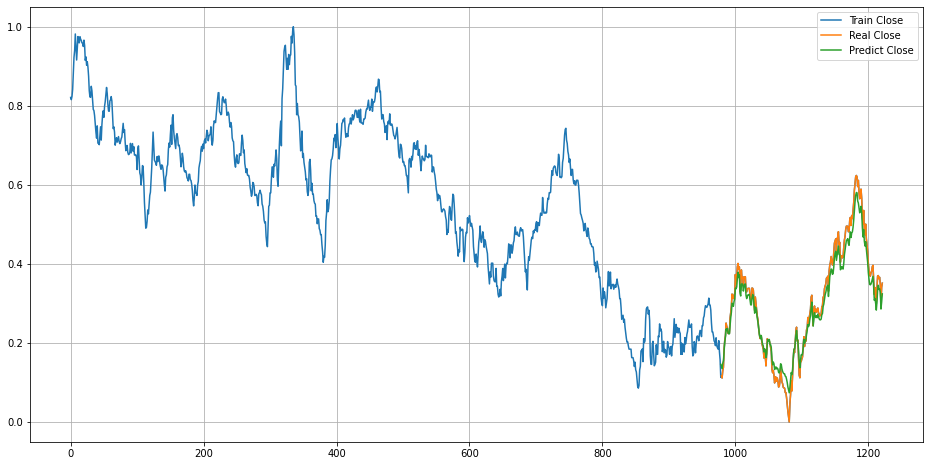

In [172]:
y_pred = model.predict(x_test) 
fig, ax = plt.subplots(1, figsize = (16,8))
ax.plot(example1_['time'],y_dataset)
ax.plot(example1_['time'][y_train.shape[0]+1:], y_test)
ax.plot(example1_['time'][y_train.shape[0]:], y_pred)
plt.legend(['Train Close', 'Real Close', 'Predict Close'])
plt.grid()

# Построение нейронной сети без LSTM слоя

In [130]:
model1 = Sequential()
model1.add(Dense(x_train.shape[1], input_shape=[x_train.shape[1], 1]))
model1.add(Dense(x_train.shape[1]))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss = 'mean_squared_error')
model1.fit(x_train, y_train, batch_size = 1, epochs=10)
model1.evaluate(x_test[0:-1], y_test)
print(model1.summary())

Epoch 1/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0357
Epoch 2/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0340
Epoch 3/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0338
Epoch 4/10
978/978 [==============================] - 1s 990us/step - loss: 0.0337
Epoch 5/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0338
Epoch 6/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0342
Epoch 7/10
978/978 [==============================] - 1s 997us/step - loss: 0.0339
Epoch 8/10
978/978 [==============================] - 1s 979us/step - loss: 0.0339
Epoch 9/10
978/978 [==============================] - 1s 1ms/step - loss: 0.0339
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0766
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (No

# Предсказание нейронной сетью без слоя LSTM

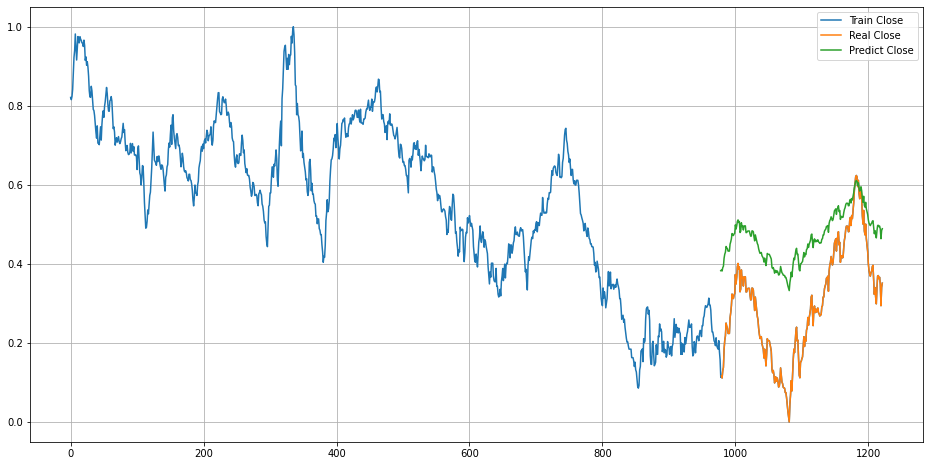

In [171]:
y_pred1 = model1.predict(x_test) 
fig, ax = plt.subplots(1, figsize = (16,8))
ax.plot(example1_['time'],y_dataset)
ax.plot(example1_['time'][y_train.shape[0]+1:], y_test)
ax.plot(example1_['time'][y_train.shape[0]:], y_pred1[0:, 3])
plt.legend(['Train Close', 'Real Close', 'Predict Close'])
plt.grid()